# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
import cv2
import imghdr

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
data_dir = 'data'

# 3. Load Data

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')

Found 305 files belonging to 2 classes.


In [19]:
data_iterator = data.as_numpy_iterator()

In [20]:
batch = data_iterator.next()

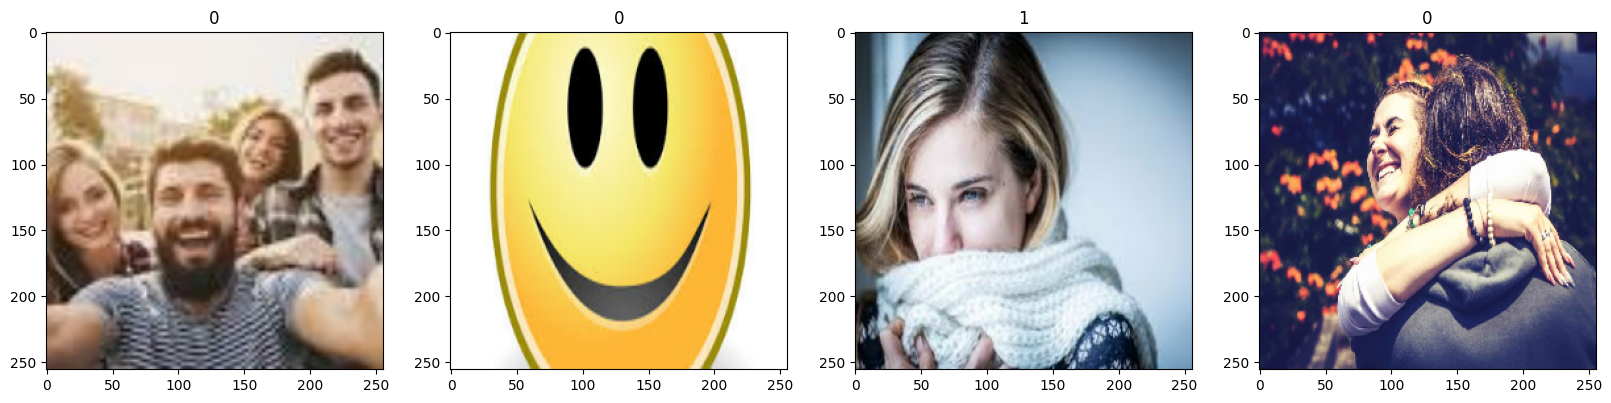

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [22]:
data = data.map(lambda x,y: (x/255, y))

In [23]:
data.as_numpy_iterator().next()

(array([[[[0.15294118, 0.20784314, 0.10980392],
          [0.15260416, 0.20750612, 0.1091299 ],
          [0.15107231, 0.20597427, 0.10606617],
          ...,
          [0.75836396, 0.558364  , 0.29954043],
          [0.75070465, 0.55070466, 0.2918811 ],
          [0.7490196 , 0.54901963, 0.2901961 ]],
 
         [[0.15091912, 0.20582108, 0.10778186],
          [0.15055315, 0.20545511, 0.10707888],
          [0.14888965, 0.2037916 , 0.10388351],
          ...,
          [0.76157343, 0.5629215 , 0.30307114],
          [0.7540458 , 0.5553938 , 0.2952802 ],
          [0.7523897 , 0.55373776, 0.29356617]],
 
         [[0.14172794, 0.1966299 , 0.09859069],
          [0.14123033, 0.19613229, 0.09775606],
          [0.13896844, 0.1938704 , 0.0939623 ],
          ...,
          [0.7761621 , 0.58363754, 0.3191198 ],
          [0.76923275, 0.57670826, 0.31073046],
          [0.76770836, 0.5751838 , 0.3088848 ]],
 
         ...,
 
         [[0.44390318, 0.42429534, 0.31056985],
          [0.45309

# 5. Split Data

In [24]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [25]:
train_size

7

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [27]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [33]:
logdir='logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
7/7 [==============================] - 14s 2s/step - loss: 0.0167 - accuracy: 0.9955 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 11s 1s/step - loss: 0.0223 - accuracy: 0.9911 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 14s 2s/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 12s 2s/step - loss: 0.0256 - accuracy: 0.9911 - val_loss: 0.0208 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 11s 1s/step - loss: 0.0229 - accuracy: 0.9911 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 12s 2s/step - loss: 0.0148 - accuracy: 0.9955 - val_loss: 0.0175 - val_accuracy: 0.9844
Epoch 7/10
7/7 [==============================] - 12s 2s/step - loss: 0.0151 - accuracy: 0.9911 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 8/10
7/7 [==================

# 8. Plot Performance

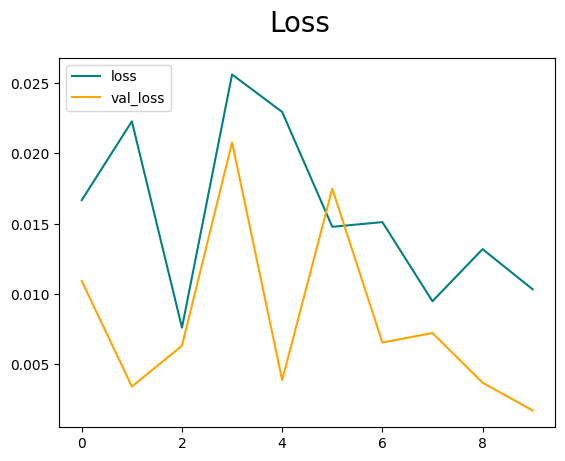

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

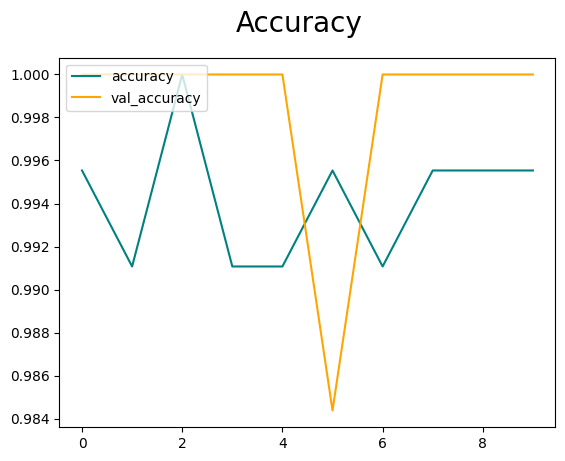

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [39]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [40]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [41]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 521ms/step


In [42]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
